In [78]:
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
PATH = "../fio/randwrite"
EXT = "*.log"

In [80]:
#load data
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

In [81]:
all_csv_files.sort()
all_csv_files

['../fio/randwrite/trace_randwrite16B_bw.log',
 '../fio/randwrite/trace_randwrite16B_lat.log',
 '../fio/randwrite/trace_randwrite4B_bw.log',
 '../fio/randwrite/trace_randwrite4B_lat.log',
 '../fio/randwrite/trace_randwrite64B_bw.log',
 '../fio/randwrite/trace_randwrite64B_lat.log']

In [82]:
#read csv data 
#pd.options.display.float_format = '{:.6f}'.format
#date d'arrivée --> milliseconde
#bw/lat---> KiB/sec|nanoseconde 
#type---> read=0|write=1 
#taille/offset---> Bytes
df_write = [pd.read_csv(file, delimiter=",", names=["date", "bw|lat", "type","taille", "offset", "prio"]) 
                                             for file in all_csv_files]

In [83]:
df_write[0].columns

Index(['date', 'bw|lat', 'type', 'taille', 'offset', 'prio'], dtype='object')

In [84]:
#convertisseur 
ms_to_sec = 1e-3
ns_to_sec = 1e-9
kib_to_kb = 1.024

**Representations graphiques des latences pour les différentes tailles**

In [85]:
#Latence respectivements pour les tailles 4B, 16B, 64B
df_write_lat = [df_write[3], df_write[1],df_write[5]]
df_write_bw[0].head()

,date,bw|lat,type,taille,offset,prio
0,0,8,1,4,975396,0
1,1,9,1,4,940988,0
2,1,9,1,4,6616,0
3,2,9,1,4,858244,0
4,2,11,1,4,448644,0


In [101]:
pd.options.display.float_format = '{:.8f}'.format
(df_write_lat[0]["bw|lat"].describe())*ns_to_sec

count   0.00025000
mean    0.00059625
std     0.00379952
min     0.00027480
25%     0.00036682
50%     0.00039654
75%     0.00048111
max     0.64079845
Name: bw|lat, dtype: float64

In [86]:
# Regrouper les données(bw|lat) qui ont les dates d'arrivées en calcul la moyenne
df_write_lat_mean = [df.groupby(["date"], as_index=False).mean() for df in df_write_lat]
df_write_lat_mean[0].head()

,date,bw|lat,type,taille,offset,prio
0,99,99578346.0,1.0,4.0,60312.0,0.0
1,167,67038115.0,1.0,4.0,740288.0,0.0
2,233,66816918.0,1.0,4.0,843180.0,0.0
3,300,66255503.0,1.0,4.0,470012.0,0.0
4,366,66640305.0,1.0,4.0,401912.0,0.0


In [87]:
#données des lectures aleatoires  par une taille de 4 bytes
begin_time_lat4 = df_write_lat_mean[0]["date"][0]
x_lat4 = (df_write_lat_mean[0]["date"] - begin_time_lat4)*ms_to_sec
y_lat4 = (df_write_lat_mean[0]["bw|lat"])*ns_to_sec
y_lat4.tail()

123285    0.000406
123286    0.000375
123287    0.000599
123288    0.000368
123289    0.000409
Name: bw|lat, dtype: float64

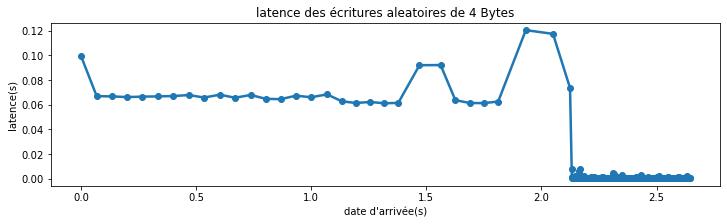

In [88]:
#plot des latences des lectures aleatoires par un pas de 4 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat4[:500], y_lat4[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des écritures aleatoires de 4 Bytes')
plt.savefig("../outplot_fio/write/rand/latence/write4B.png")
plt.show()

In [89]:
#données des lectures seq par une taille de 16 bytes
begin_time_lat16 = df_write_lat_mean[1]["date"][0]
x_lat16 = (df_write_lat_mean[1]["date"] - begin_time_lat16)*ms_to_sec
y_lat16 = (df_write_lat_mean[1]["bw|lat"])*ns_to_sec
y_lat16.tail()

30696    0.000635
30697    0.000656
30698    0.001596
30699    0.000725
30700    0.000778
Name: bw|lat, dtype: float64

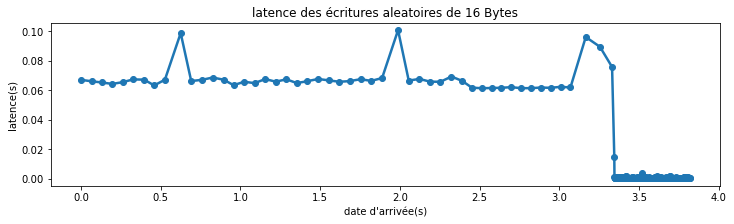

In [90]:
#plot des données des lectures seq par une taille de 16 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat16[:500], y_lat16[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des écritures aleatoires de 16 Bytes')
plt.savefig("../outplot_fio/write/rand/latence/write16B.png")
plt.show()

In [91]:
#données des lectures seq par une taille de 64 bytes
begin_time_lat64 = df_write_lat_mean[2]["date"][0]
x_lat64 = (df_write_lat_mean[2]["date"] - begin_time_lat64)*ms_to_sec
y_lat64 = (df_write_lat_mean[2]["bw|lat"])*ns_to_sec
y_lat64.tail()

7752    0.000372
7753    0.000411
7754    0.000361
7755    0.000579
7756    0.000355
Name: bw|lat, dtype: float64

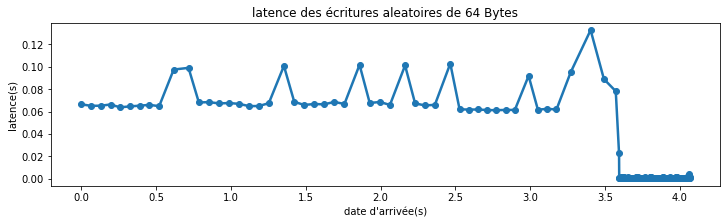

In [92]:
#plot des données des lectures seq par une taille de 64 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_lat64[:500], y_lat64[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("latence(s)")
plt.title('latence des écritures aleatoires de 64 Bytes')
plt.savefig("../outplot_fio/write/rand/latence/write64B.png")
plt.show()

**Representations graphiques des bandwiths pour les différentes tailles**

In [93]:
#Bandwiths respectivements pour les tailles 4B, 16B, 64B
df_write_bw = [df_write[2], df_write[0],df_write[4]]
df_write_bw[0].head()

,date,bw|lat,type,taille,offset,prio
0,99,0,1,4,60312,0
1,167,0,1,4,740288,0
2,233,0,1,4,843180,0
3,300,0,1,4,470012,0
4,366,0,1,4,401912,0


In [94]:
# Regrouper les données(bw|lat) qui ont les dates d'arrivées en calcul la moyenne
df_write_bw_mean = [df.groupby(["date"], as_index=False).mean() for df in df_write_bw]
df_write_bw_mean[1].head()

,date,bw|lat,type,taille,offset,prio
0,67,0.0,1.0,16.0,60304.0,0.0
1,133,0.0,1.0,16.0,740288.0,0.0
2,198,0.0,1.0,16.0,843168.0,0.0
3,263,0.0,1.0,16.0,470000.0,0.0
4,328,0.0,1.0,16.0,401904.0,0.0


In [95]:
#données(bw) des lectures aleatoires par une taille de 4 bytes
begin_time_bw4 = df_write_bw_mean[0]["date"][0]
x_bw4 = (df_write_bw_mean[0]["date"] - begin_time_bw4)*ms_to_sec
y_bw4 = (df_write_bw_mean[0]["bw|lat"])*kib_to_kb
y_bw4.tail()

123291     9.557333
123292    10.752000
123293     7.168000
123294    10.240000
123295     9.898667
Name: bw|lat, dtype: float64

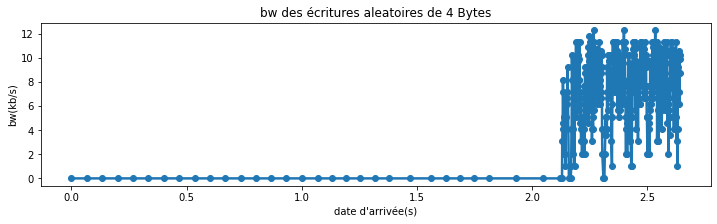

In [96]:
#plot des bw des lectures aleatoires par un pas de 4 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw4[:500], y_bw4[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des écritures aleatoires de 4 Bytes')
plt.savefig("../outplot_fio/write/rand/bw/write4B.png")
plt.show()

In [97]:
#données(bw) des lectures seq par une taille de 16 bytes
begin_time_bw16 = df_write_bw_mean[1]["date"][0]
x_bw16 = (df_write_bw_mean[1]["date"] - begin_time_bw16)*ms_to_sec
y_bw16 = (df_write_bw_mean[1]["bw|lat"])*kib_to_kb
y_bw16.tail()

30697    25.600
30698    24.576
30699    10.240
30700    22.528
30701    20.480
Name: bw|lat, dtype: float64

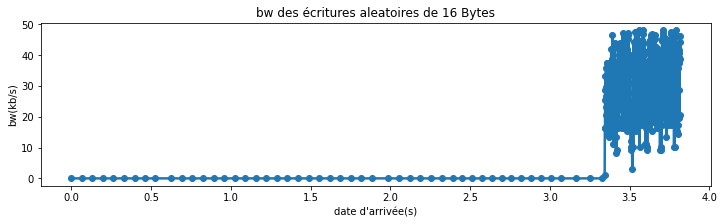

In [98]:
#plot des bw des lectures seq par un pas de 16 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw16[:500], y_bw16[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des écritures aleatoires de 16 Bytes')
plt.savefig("../outplot_fio/write/rand/bw/write16B.png")
plt.show()

In [99]:
#données(bw) des lectures seq par une taille de 64 bytes
begin_time_bw64 = df_write_bw_mean[2]["date"][0]
x_bw64 = (df_write_bw_mean[2]["date"] - begin_time_bw64)*ms_to_sec
y_bw64 = (df_write_bw_mean[2]["bw|lat"])*kib_to_kb
y_bw64.tail()

7750    175.616000
7751    159.061333
7752    181.248000
7753    128.512000
7754    184.320000
Name: bw|lat, dtype: float64

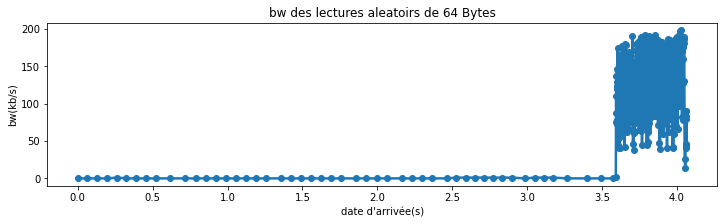

In [100]:
#plot des bw des lectures seq par un pas de 64 bytes
plt.figure(figsize=(12, 3))
plt.plot(x_bw64[:500], y_bw64[:500], "-o",linewidth =2.5)
plt.xlabel("date d'arrivée(s)")
plt.ylabel("bw(kb/s)")
plt.title('bw des lectures aleatoirs de 64 Bytes')
plt.savefig("../outplot_fio/write/rand/bw/write64B.png")
plt.show()